### Dependencies

In [2]:
import matplotlib as mpl
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

new_rc_paramas = {
    'text.usetex' : True,
    'figure.dpi' : 180,
    'text.latex.preamble' : r'\usepackage{libertine}'r'\usepackage{libertinust1math}',
    'font.family' : 'Linux Libertine',
    'axes.titlesize' : 22,
    'axes.labelsize' : 18,
    'xtick.labelsize' : 16,
    'ytick.labelsize' : 16,
    'xtick.direction' : 'in',
    'ytick.direction' : 'in',
    'xtick.top' : True,
    'ytick.right' : True,
    'legend.fontsize' : 'large',
    'axes.linewidth' : 1.2,
    'savefig.bbox' : 'tight',
    'image.aspect' : 'equal',
}

Oh2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^2)$')
Oh3 = mlines.Line2D([], [], color='black', linestyle="-.", label=r'$\mathcal{O}(h^3)$')
Oh1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h)$')
Ohneg2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-2})$')
Ohneg1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-1})$')
Odt = mlines.Line2D([], [], color='black', linestyle="--", label=r'$\mathcal{O}(\Delta t)$')
Odt2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(\Delta t^2)$')
tau1 = mlines.Line2D([], [], color='C4', linestyle="--", label=r'$\tau_0 = \tau_1 = 1$')
tau10neg4 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-4}$')
tau10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-3}$')
tau3x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-3}$')
tau5x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-3}$')
tau3x10neg4 = mlines.Line2D([], [], color='C2', linestyle="-.", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-4}$')
tau5x10neg4 = mlines.Line2D([], [], color='C3', linestyle=":", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-4}$')

conservative = mlines.Line2D([0], [0], marker='None', color='black', linestyle=":", label='Conservative')
classical = mlines.Line2D([0], [0], marker='None', color='black', linestyle=(0, (5,7)), label='Non-conservative')


space = mlines.Line2D([0], [0], marker='None', color='None', linestyle="None", label=' ')

circle = mlines.Line2D([0], [0], marker='o', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Full stabilization.')
                          
star = mlines.Line2D([], [], color='black', marker='*',
                          markersize=9,linestyle="None",
                        markeredgewidth=0.8, markerfacecolor="None", 
                        label='Macro stabilization.')

triangle = mlines.Line2D([0], [0], marker='^', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Macro stab. 2')


import matplotlib.pyplot as plt

mpl.rcParams.update(new_rc_paramas)

import numpy as np

def convergence_rate(errors, mesh_sizes):
    if len(errors) < 2 or len(mesh_sizes) < 2 or len(errors) != len(mesh_sizes):
        raise ValueError("At least two errors and mesh sizes are required.")

    # Take logarithm of errors and mesh sizes
    log_errors = np.log(errors)
    log_mesh_sizes = np.log(mesh_sizes)

    # Compute differences between consecutive elements
    delta_errors = np.diff(log_errors)
    delta_mesh_sizes = np.diff(log_mesh_sizes)

    # Compute convergence rate
    convergence_rates = delta_errors / delta_mesh_sizes

    return convergence_rates


### No-flow

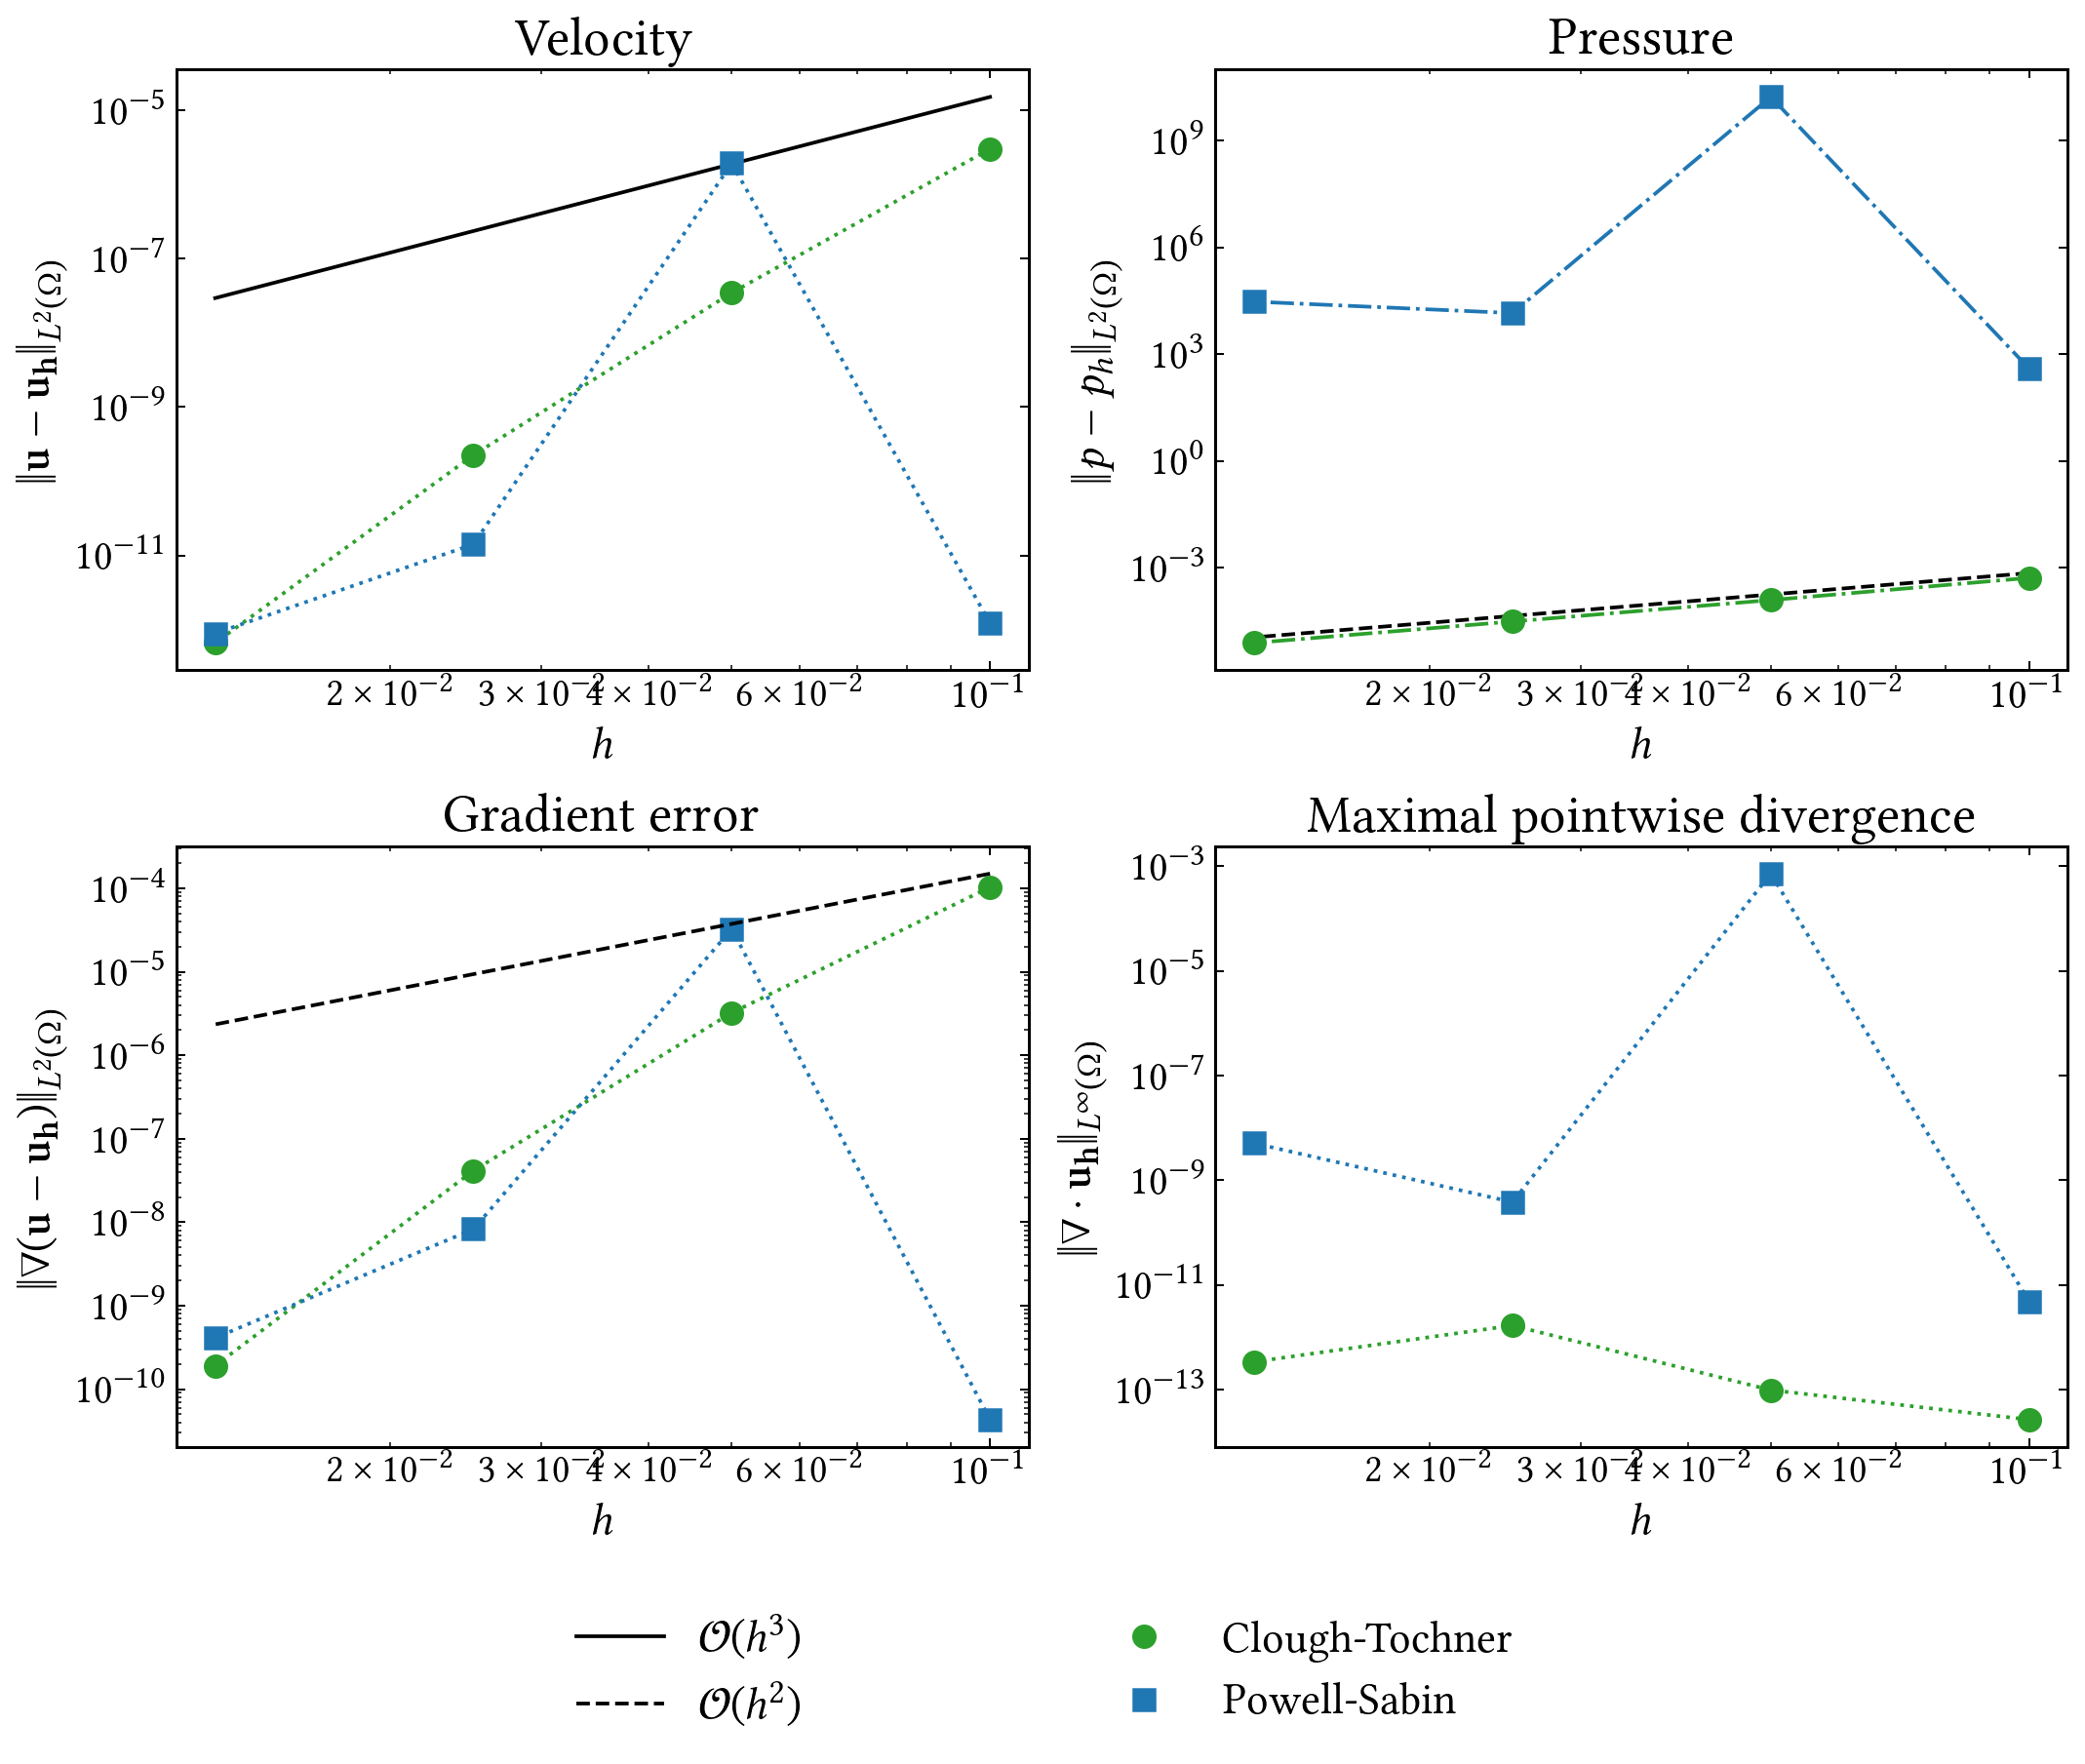

In [2]:
# regular mesh
h = [0.1, 0.05, 0.025, 0.0125]
N = [200, 800, 3200, 12800]

# Ra = 1, lambda = 1e1, regular mesh
err_u_ra_1e0 = [3.468614000171409e-05, 2.274158404306178e-07, 1.447146087210906e-09, 4.724387427318006e-12]
err_p_ra_1e0 = [0.00131497589281262, 0.0002112032195808919, 4.952420749807949e-05, 1.217960333415723e-05]
err_grad_ra_1e0 = [0.0002269292958139199, 3.447326411619173e-06, 9.255062111987746e-08, 1.103930485185392e-09]
err_div_ra_1e0 = [1.447214743877101e-14, 2.949765458758051e-14, 6.73089126692148e-14, 2.636189839102089e-13]

# Ra = 1, lambda = 1e7, regular mesh
err_u_ra_1e0 = [1.812016722762194e-11, 2.376080035563172e-13, 1.53402020994982e-15, 2.004157741807925e-16]
err_p_ra_1e0 = [0.001839672937041298, 0.000459925925749046, 0.0001149756966752645, 2.881629313389986e-05]
err_grad_ra_1e0 = [5.758191798725681e-10, 1.520051082067384e-11, 1.971423032888136e-13, 5.93347885255457e-15]
err_div_ra_1e0 = [1.374983940264014e-14, 2.840484321117415e-14, 1.188421092983064e-13, 1.389543849216974e-13]

# Ra = 1, lambda = 1e1, Powell-Sabin mesh
err_u_ra_1e0 = [9.723795191455951e-06, 7.901558838855177e-09, 2.01972920034334e-10, 2.803909491027998e-08]
err_p_ra_1e0 = [19.28598971971109, 727.6476690679859, 40762.57027275571, 5477723751.827546]
err_grad_ra_1e0 = [5.053239713115048e-05, 3.319440179073853e-07, 1.193389678681378e-07, 2.026430894388386e-05]
err_div_ra_1e0 = [4.601339925400239e-13, 1.368539667596971e-11, 1.730065732104362e-09, 0.0001349536455913401]


# Ra = 1, lambda = 1e7, Powell-Sabin mesh
err_u_ra_1e0 = [1.224637072906876e-12, 1.916163895261262e-06, 1.416007162699042e-11, 8.928033075005506e-13]
err_p_ra_1e0 = [392.8761518176171, 16797163162.95951, 14187.17893216807, 29690.94592835813]
err_grad_ra_1e0 = [4.310164921699995e-11, 3.254336783011601e-05, 8.256041943571689e-09, 4.101963117747654e-10]
err_div_ra_1e0 = [4.79862481700525e-12, 0.000718564673161521, 3.797687064012445e-10, 5.049747796058859e-09]

# powell-sabin
h = [0.05, 0.025, 0.0125, 0.00625]
N = [1200, 4800, 19200, 76800]

# Ra = 1e3, lambda = 1e7
err_u_ra_1e3 = [1.812016608597777e-08, 2.376059668345405e-10, 1.529014122510998e-12, 1.969081869022467e-13]
err_p_ra_1e3 = [1.839672938896543, 0.4599259036851933, 0.1149741596710596, 0.02876690081000432]
err_grad_ra_1e3 = [5.758194594508891e-07, 1.520039879568065e-08, 1.96940272801568e-10, 5.613858766962793e-12]
err_div_ra_1e3 = [3.170766664892244e-11, 2.098169590986131e-11, 9.753489015859242e-11, 9.296484189854777e-11]

### BDM1 x P0, Ra = 1, lambda = 1e1, regular mesh
err_u_ra_1e0_bdm = [0.0009712599761174755, 4.975823415724372e-05, 3.30934259471243e-07, 5.308874443833557e-09]
err_p_ra_1e0_bdm = [0.03888744911099412, 0.01912637813590067, 0.009562178910751382, 0.004781089857230917]
err_grad_ra_1e0_bdm = [0.005895447314543087, 0.0018608872442051, 2.027283605346556e-05, 9.996798445650668e-07]
err_div_ra_1e0_bdm = [4.076600168545497e-16, 1.624676955469528e-14, 9.280638120522967e-14, 8.648854736954015e-14]


# Clough-Tocher refinement
# Scott-Vogelius
err_u_ra_1e0_ct = [2.995432203196125e-06, 3.452499625154579e-08, 2.245779159124211e-10, 6.636146602731731e-13]
err_p_ra_1e0_ct = [0.0005126351914162359, 0.000122043710808088, 3.04649036962131e-05, 7.616913473341755e-06]
err_grad_ra_1e0_ct = [0.0001031263312073908, 3.229758427808691e-06, 4.144019823614162e-08, 1.898559616223105e-10]
err_div_ra_1e0_ct = [2.652924311453915e-14, 9.734097124132262e-14, 1.667692243596152e-12, 3.378150204937432e-13]

h = [0.1, 0.05, 0.025, 0.0125]  
N = [600, 2400, 9600, 38400]

fig, axs = plt.subplots(2, 2, figsize=(12, 9))

#! L2 error
axs[0,0].loglog(h, 1.5e-2*np.power(h, 3), label=r"$\mathcal{O}(h^{3})$", linestyle="-", color="black")  
axs[0,1].loglog(h, 7.e-2*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="--", color="black")  

axs[0,0].loglog(h, err_u_ra_1e0_ct, linestyle=":",  marker='o', markersize=9, color="C2") 
axs[0,1].loglog(h, err_p_ra_1e0_ct, linestyle="-.",  marker='o', markersize=9, color="C2") 

axs[0,0].loglog(h, err_u_ra_1e0, linestyle=":",  marker='s', markersize=9, color="C0") 
axs[0,1].loglog(h, err_p_ra_1e0, linestyle="-.",  marker='s', markersize=9, color="C0") 

axs[0,0].set_xlabel(r"$h$", fontsize=18)
axs[0,0].tick_params(axis='both', which='major', labelsize=17)
axs[0,0].set_ylabel(r"$\|\mathbf{u}-\mathbf{u_h}\|_{L^2(\Omega)}$", fontsize=18)
axs[0,0].set_title(r"Velocity")


axs[0,1].loglog([],[], linestyle="None", label=" ")
axs[0,1].loglog([],[], linestyle="None", label=" ")
axs[0,1].loglog([],[], linestyle="None",  marker='o', markersize=9, color="C2", label=r"Clough-Tochner")
axs[0,1].loglog([],[], linestyle="None",  marker='s', markersize=9, color="C0", label=r"Powell-Sabin")

axs[0,1].set_title(r"Pressure")
axs[0,1].set_xlabel(r"$h$", fontsize=18)
axs[0,1].tick_params(axis='both', which='major', labelsize=17)
axs[0,1].set_ylabel(r"$\|p-p_h\|_{L^2(\Omega)}$", fontsize=18)

#! 
axs[1,0].loglog(h, err_grad_ra_1e0_ct, linestyle=":",  marker='o', markersize=9, color="C2")
axs[1,0].loglog(h, err_grad_ra_1e0, linestyle=":",  marker='s', markersize=9, color="C0")
axs[1,0].loglog(h, 1.5e-2*np.power(h, 2), linestyle="--", color="black")  
axs[1,0].set_xlabel(r"$h$", fontsize=18)
axs[1,0].tick_params(axis='both', which='major', labelsize=17)
axs[1,0].set_ylabel(r"$\|\nabla(\mathbf{u}-\mathbf{u_h})\|_{L^2(\Omega)}$")
axs[1,0].set_title(r"Gradient error")

axs[1,1].loglog(h, err_div_ra_1e0_ct, linestyle=":",  marker='o', markersize=9, color="C2")
axs[1,1].loglog(h, err_div_ra_1e0, linestyle=":",  marker='s', markersize=9, color="C0")
axs[1,1].set_title(r"Maximal pointwise divergence")
axs[1,1].set_xlabel(r"$h$", fontsize=18)
axs[1,1].tick_params(axis='both', which='major', labelsize=17)
axs[1,1].set_ylabel(r"$\|\nabla\cdot \mathbf{u_h}\|_{L^{\infty}(\Omega)}$")

handles, labels = [(a + b) for a, b in zip(axs[0,0].get_legend_handles_labels(), axs[0,1].get_legend_handles_labels())]
fig.legend(handles, labels, loc='lower center', ncols=3, bbox_to_anchor=(0.5, -0.125), fontsize=18, frameon=False)

plt.tight_layout()
plt.show()


### Fictitious domain

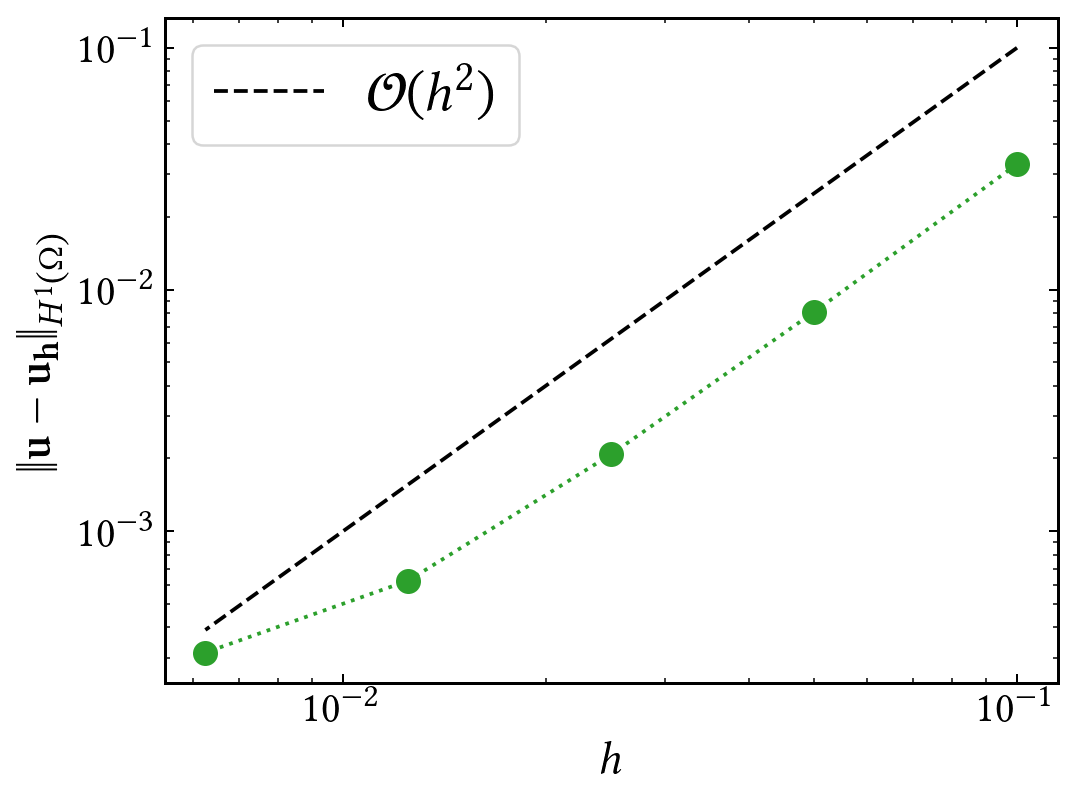

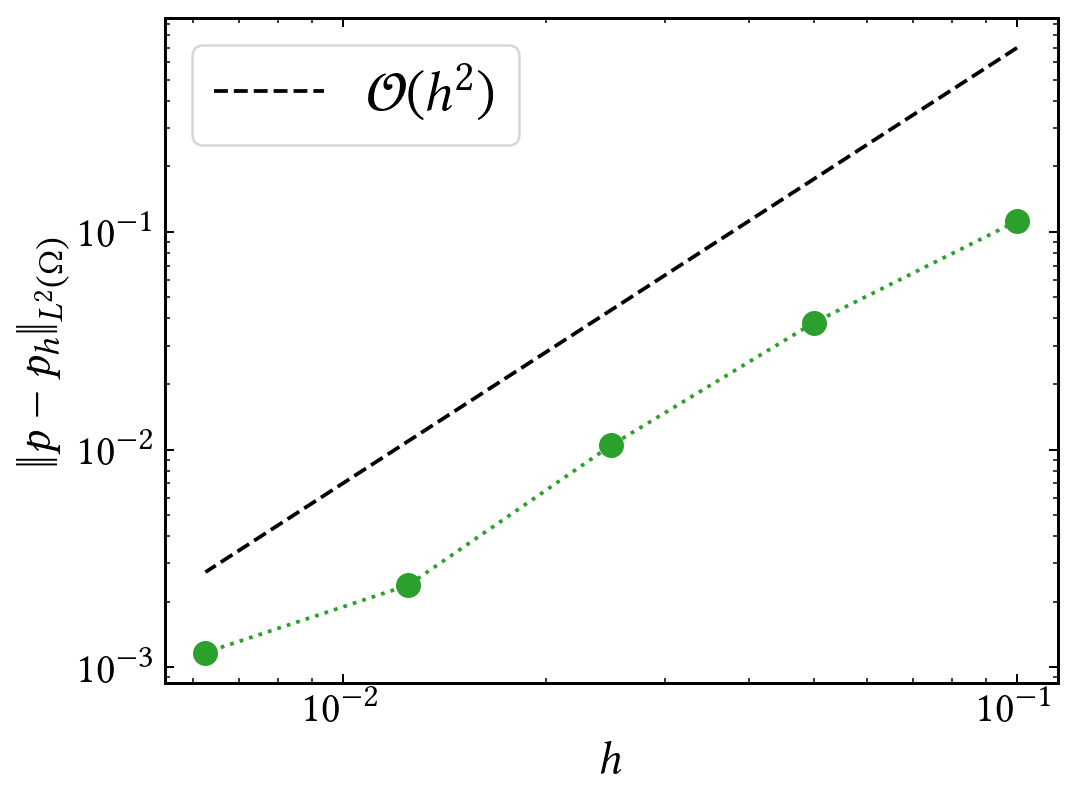

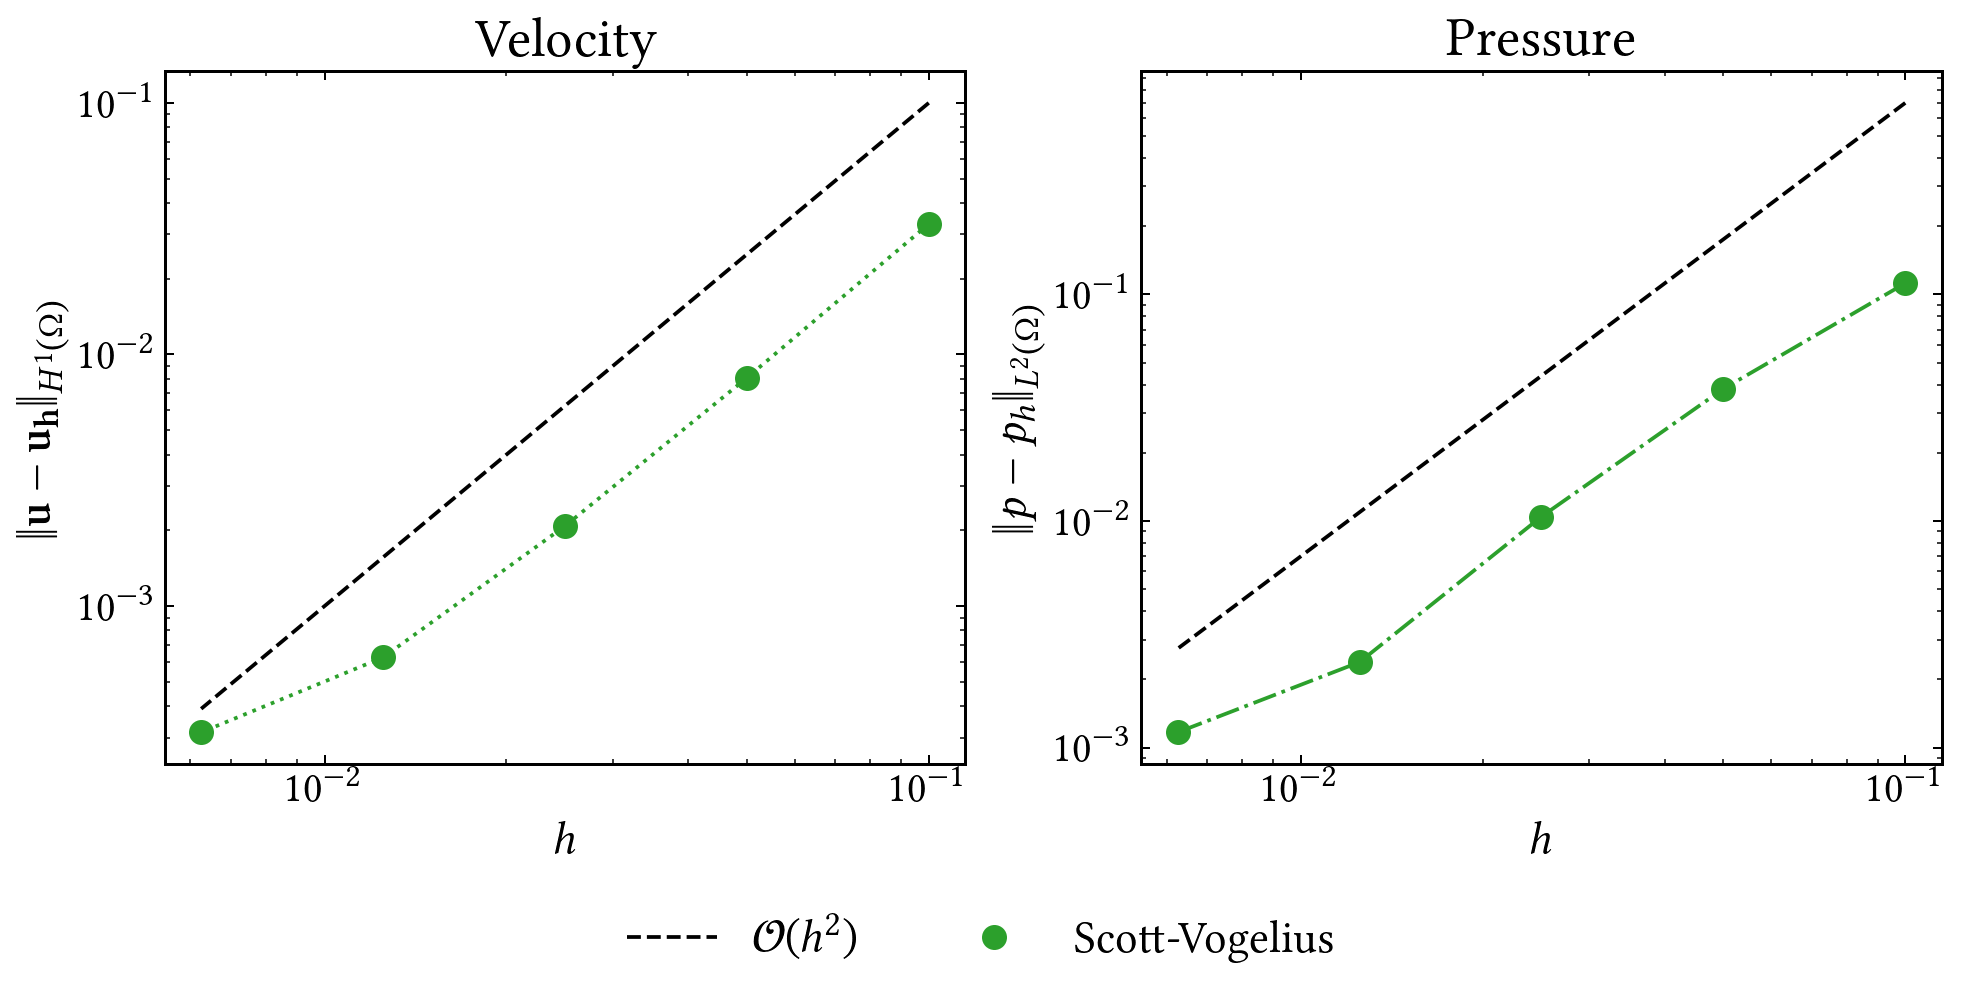

In [3]:
# Scott-Vogelius (Clough-Tocher refinement) (boundary_penalty = 4000, tau_u = 1, tau_p = 1, patch macro stabilization) using hreg
L2_err_u_sv = [0.000429085864905328, 6.851306935262103e-05, 2.302805713893656e-05, 1.116030680151381e-05, 5.567719879264603e-06]
L2_err_p_sv = [0.1139277601199662, 0.05965584153645585, 0.01428950045791705, 0.002154022124187481, 0.0008543861257459535]
H1_err_u_sv = [0.03048026681271924, 0.007372816557869545, 0.001887786961189107, 0.0005560009983620204, 0.0002745681848061615]
pwise_div_sv = [6.364908600176022e-13, 2.416022937268281e-11, 3.50446782704239e-10, 9.945733125960032e-11, 4.071409875905374e-10]

# Scott-Vogelius (Clough-Tocher refinement) (boundary_penalty = 4000, tau_u = 1, tau_p = 1, patch macro stabilization) using hreg
L2_err_u_sv = [0.003143197214804922, 0.001607036999170928, 0.000803888076745115, 0.0004041059610821813, 0.0002016671025014857]
L2_err_p_sv = [0.09730288107627727, 0.05505966733812934, 0.03591615909407065, 0.02458506620855953, 0.01750537230823874]
H1_err_u_sv = [0.05146782228880565, 0.02818281774031799, 0.01949216430273181, 0.01356084355122616, 0.009869169267793462]
pwise_div_sv = [3.633315870388287e-12, 6.068923141810956e-12, 6.539480068568082e-11, 1.239630620375465e-10, 4.117168828088325e-10]

# Scott-Vogelius (Clough-Tocher refinement) (boundary_penalty = 1e4, tau_u = 1, tau_p = 1, patch macro stabilization) using hreg
# L2_err_u_sv = [0.0004664954803804385, 6.807024657526999e-05, 1.090887076046751e-05, 4.518366713382944e-06, 2.232102910108159e-06]
# L2_err_p_sv = [0.1540461820806228, 0.1271738626550455, 0.03149919298732719, 0.003367501598232441, 0.001041096625591669]
# H1_err_u_sv = [0.03279303629909048, 0.007786834166051967, 0.001872627823327476, 0.0004681350537779315, 0.0001478546821480706]
# pwise_div_sv = [6.015188347419098e-13, 8.231193504570911e-12, 4.867684033627029e-11, 3.896438727224449e-11, 5.269811254038359e-10]  # mumps


# # Scott-Vogelius (Clough-Tocher refinement) (boundary_penalty = 5e4, tau_u = 1, tau_p = 1, patch macro stabilization) using hreg
L2_err_u_sv = [0.0006314464751405284, 0.0001313493593157093, 1.163272286048498e-05, 1.212351942206923e-06, 4.573731352220545e-07]
L2_err_p_sv = [0.3623985864412905, 0.4216216733470723, 0.1322983980080292, 0.01252204462469779, 0.003901823405440024]
H1_err_u_sv = [0.03673772343094415, 0.009741515380024879, 0.002117048273256434, 0.0004667583521458001, 0.0001151919971438193]
pwise_div_sv = [2.894262607355813e-11, 4.78626027700102e-11, 2.460029957518373e-10, 1.027515850182681e-09, 1.728025722513848e-09]


# Scott-Vogelius (Clough-Tocher refinement) (boundary_penalty = 4e3, tau_u = 1, tau_p = 1, patch macro stabilization) using hreg
L2_err_u_sv = [0.0003910101584684988, 6.411022921232773e-05, 2.295132519456149e-05, 1.115947368745444e-05, 5.567678871792887e-06]
L2_err_p_sv = [0.1124469221028098, 0.03714325462838042, 0.0094109593113606, 0.001934851676297811, 0.0008014167289950667]
H1_err_u_sv = [0.0329041153325661, 0.008132563286355756, 0.002078098783353472, 0.0006028238423440615, 0.000281081190725163]
pwise_div_sv = [5.711958683818352e-13, 5.761825044858782e-11, 1.504628643900219e-10, 8.410366847400041e-11, 8.159652953310115e-10]

# lambda=4000, using 2*Eps instead of grad
L2_err_u_sv = [0.0004075950999796927, 7.186262499911909e-05, 3.151333389890963e-05, 1.580835211851659e-05, 7.929872992855753e-06]
L2_err_p_sv = [0.1120174604762924, 0.03831362473476036, 0.01046174977386037, 0.002385061580071323, 0.001168632714401623]
H1_err_u_sv = [0.03299950278067835, 0.008074835587810355, 0.002080712420667377, 0.0006250581030173309, 0.0003148938340356873]
pwise_div_sv = [1.360356272073204e-12, 1.19973475598556e-12, 1.908703750608254e-11, 1.189647269583816e-10, 2.647414509837631e-10]


# Taylor-Hood (Clough-Tocher refinement)
error_u_th = [0.01407078045990627, 0.001605990345521804, 4.461479333192925e-05, 6.653952433816277e-07]
error_p_th = [0.2751091245155785, 0.04051252278228147, 0.001869439817290441, 0.0002594680876161519]
H1_err_u_th = [0.2867683620579319, 0.03661809674672049, 0.00171083619130607, 0.0002506059632425196]
err_div_th = [3.012506199615393, 0.6099043528684365, 0.03047208367704179, 0.002551060513751757]

# BDM1 x P0 (regular mesh)
# error_u_bdm = 
# error_p_bdm = 
# err_grad_bdm =
# err_div_bdm =

h_reg = [0.1, 0.05, 0.025, 0.0125, 0.00625]  
#N_reg = 

h = [0.05773502691896258, 0.02886751345948129, 0.01443375672974065, 0.007216878364870323, 0.003608439182435161]

h = h_reg
N_ct = [600, 2400, 9600, 38400, 153600]


plt.loglog(h, 1e1*np.power(h, 2), label=r"$\mathcal{O}(h^2)$", linestyle="--", color="black")  
plt.loglog(h, H1_err_u_sv, linestyle=":",  marker='o', markersize=9, color="C2") 
plt.xlabel(r"$h$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=17)
plt.ylabel(r"$\|\mathbf{u}-\mathbf{u_h}\|_{H^1(\Omega)}$", fontsize=18)
plt.legend(fontsize=22)
#plt.savefig("velocity_error_lambda5e4.pdf")
plt.show()

plt.loglog(h, 7.e1*np.power(h, 2), label=r"$\mathcal{O}(h^2)$", linestyle="--", color="black")  
plt.loglog(h, L2_err_p_sv, linestyle=":",  marker='o', markersize=9, color="C2") 
plt.xlabel(r"$h$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=17)
plt.ylabel(r"$\|p-p_h\|_{L^2(\Omega)}$", fontsize=18)
plt.legend(fontsize=22)
plt.savefig("pressure_error_lambda5e4.pdf")
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
#ax1.loglog(h, 7.e-2*np.power(h, 2), linestyle="--", color="black")  
#ax1.loglog(h, 2e1*np.power(h, 3), label=r"$\mathcal{O}(h^{3})$", linestyle="-", color="black")  
ax1.loglog(h, 1e1*np.power(h, 2), linestyle="--", color="black")  
ax2.loglog(h, 7.e1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="--", color="black")  

ax1.loglog(h, H1_err_u_sv, linestyle=":",  marker='o', markersize=9, color="C2") 
ax1.set_xlabel(r"$h$", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$\|\mathbf{u}-\mathbf{u_h}\|_{H^1(\Omega)}$", fontsize=18)
ax1.set_title(r"Velocity")

ax2.loglog(h, L2_err_p_sv, linestyle="-.",  marker='o', markersize=9, color="C2") 
#ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='o', markersize=9, color="C2", label=r"Scott-Vogelius")
#ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, color="C0", label=r"Taylor-Hood")
ax2.set_title(r"Pressure")
ax2.set_xlabel(r"$h$", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylabel(r"$\|p-p_h\|_{L^2(\Omega)}$", fontsize=18)


handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
fig.legend(handles, labels, loc='lower center', ncols=2, bbox_to_anchor=(0.5, -0.125), fontsize=18, frameon=False)
fig.tight_layout()
plt.savefig("scott_vogelius_lambda4e3.pdf")
plt.tight_layout()
plt.show()



# fig, axs = plt.subplots(2, 2, figsize=(12, 9))
# #! L2 error
# axs[0,0].loglog(h, 7.e-2*np.power(h, 2), linestyle="--", color="black")  
# axs[0,0].loglog(h, 2e1*np.power(h, 3), label=r"$\mathcal{O}(h^{3})$", linestyle="-", color="black")  
# axs[0,1].loglog(h, 7.e1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="--", color="black")  

# axs[0,0].loglog(h, L2_err_u_sv, linestyle=":",  marker='o', markersize=9, color="C2") 
# axs[0,1].loglog(h, L2_err_p_sv, linestyle="-.",  marker='o', markersize=9, color="C2") 

# #axs[0,0].loglog(h, err_u, linestyle=":",  marker='s', markersize=9, color="C0") 
# #axs[0,1].loglog(h, err_p, linestyle="-.",  marker='s', markersize=9, color="C0") 

# axs[0,0].set_xlabel(r"$h$", fontsize=18)
# axs[0,0].tick_params(axis='both', which='major', labelsize=17)
# axs[0,0].set_ylabel(r"$\|\mathbf{u}-\mathbf{u_h}\|_{L^2(\Omega)}$", fontsize=18)
# axs[0,0].set_title(r"Velocity")


# axs[0,1].loglog([],[], linestyle="None", label=" ")
# axs[0,1].loglog([],[], linestyle="None", label=" ")
# axs[0,1].loglog([],[], linestyle="None",  marker='o', markersize=9, color="C2", label=r"Clough-Tochner")
# axs[0,1].loglog([],[], linestyle="None",  marker='s', markersize=9, color="C0", label=r"Powell-Sabin")

# axs[0,1].set_title(r"Pressure")
# axs[0,1].set_xlabel(r"$h$", fontsize=18)
# axs[0,1].tick_params(axis='both', which='major', labelsize=17)
# axs[0,1].set_ylabel(r"$\|p-p_h\|_{L^2(\Omega)}$", fontsize=18)

# #! 
# axs[1,0].loglog(h, H1_err_u_sv, linestyle=":",  marker='o', markersize=9, color="C2")
# #axs[1,0].loglog(h, err_grad, linestyle=":",  marker='s', markersize=9, color="C0")
# axs[1,0].loglog(h, 3e1*np.power(h, 2), linestyle="--", color="black")  
# axs[1,0].set_xlabel(r"$h$", fontsize=18)
# axs[1,0].tick_params(axis='both', which='major', labelsize=17)
# axs[1,0].set_ylabel(r"$\|\mathbf{u}-\mathbf{u_h}\|_{H^1(\Omega)}$")
# axs[1,0].set_title(r"$H^1(\Omega)$ error")

# axs[1,1].loglog(h, pwise_div_sv, linestyle=":",  marker='o', markersize=9, color="C2")
# #axs[1,1].loglog(h, err_div, linestyle=":",  marker='s', markersize=9, color="C0")
# axs[1,1].set_title(r"Maximal pointwise divergence")
# axs[1,1].set_xlabel(r"$h$", fontsize=18)
# axs[1,1].tick_params(axis='both', which='major', labelsize=17)
# axs[1,1].set_ylabel(r"$\|\nabla\cdot \mathbf{u_h}\|_{L^{\infty}(\Omega)}$")

# handles, labels = [(a + b) for a, b in zip(axs[0,0].get_legend_handles_labels(), axs[0,1].get_legend_handles_labels())]
# fig.legend(handles, labels, loc='lower center', ncols=3, bbox_to_anchor=(0.5, -0.125), fontsize=18, frameon=False)

# plt.tight_layout()
# plt.show()


#### Using ngsxfem

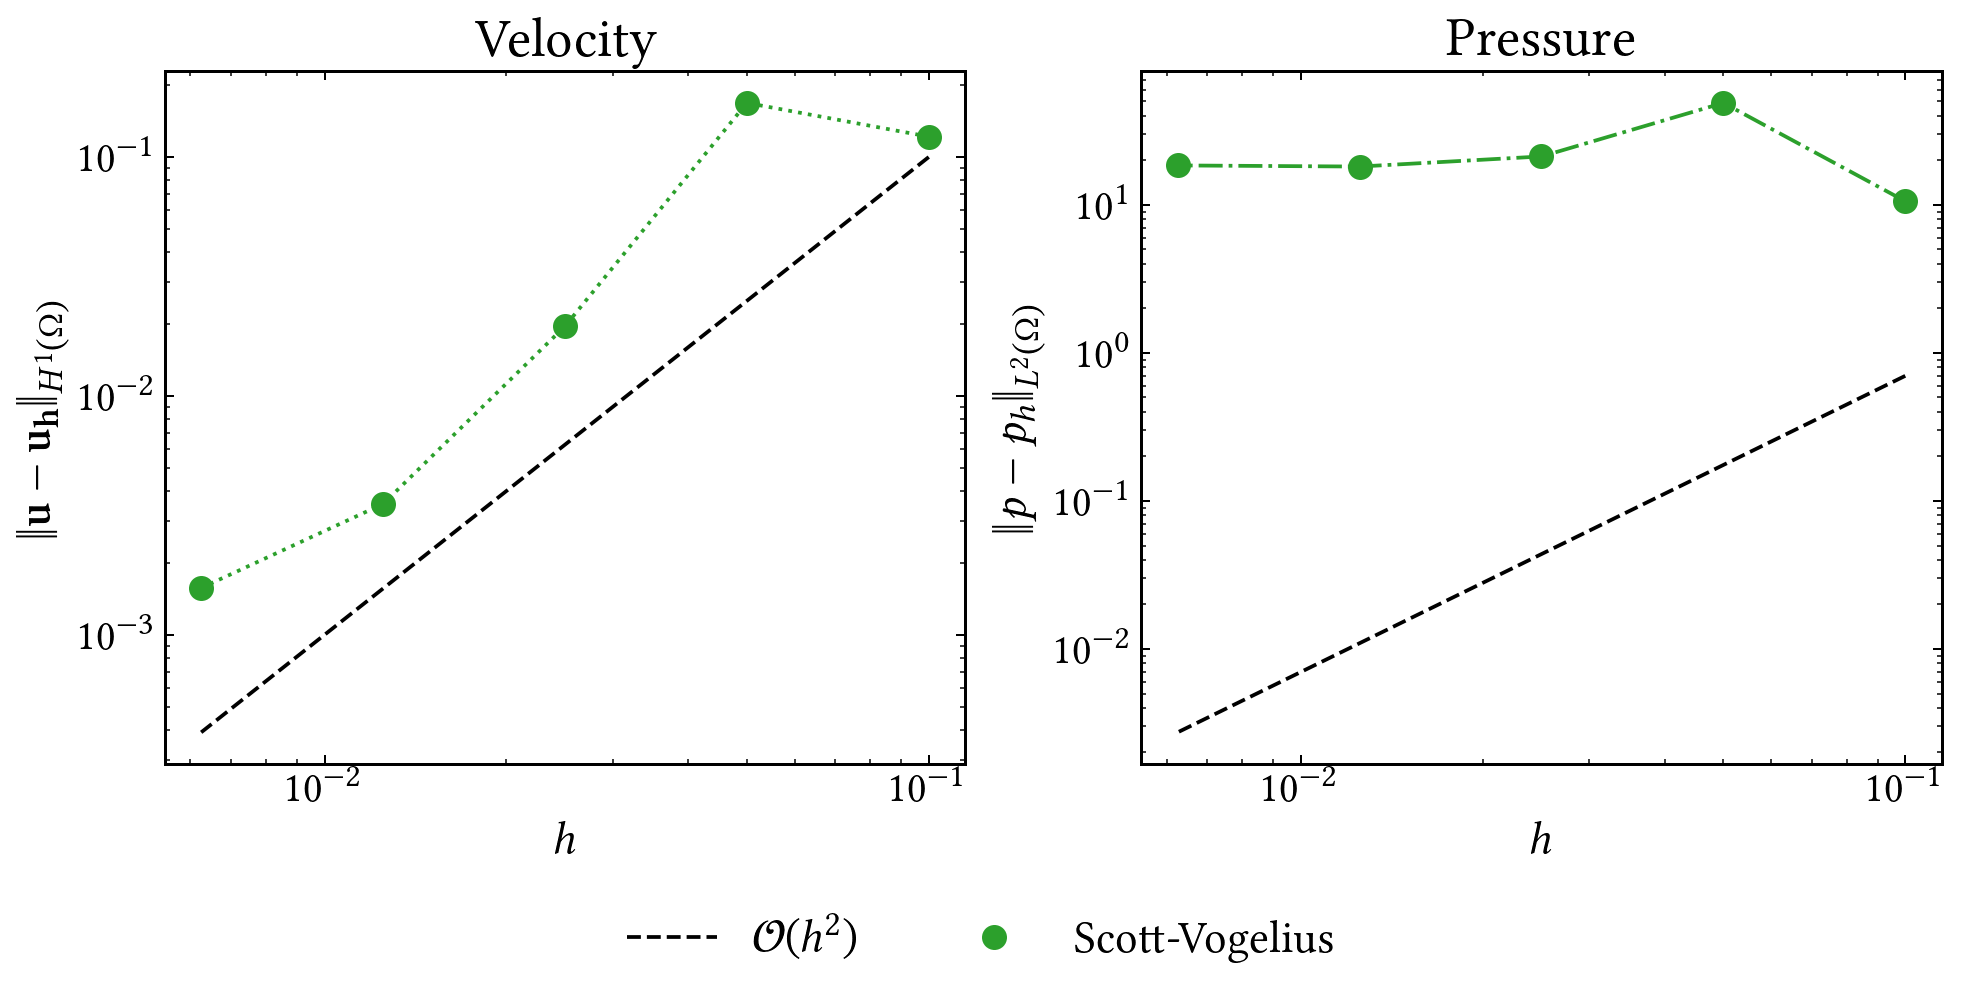

In [6]:
# lambda = 4e3
L2_err_u_sv = [0.007547051826597641, 0.010254969681063427, 0.001063809319694126, 0.0001698552456614383, 7.06403502997172e-05]
H1_err_u_sv = [0.1217165571982183, 0.1685085488422865, 0.01957246858848672, 0.003529273176041218, 0.001570997394058067]
L2_err_p_sv = [10.581862889768441, 48.85445911321952, 21.242338223895786, 18.15082906502437, 18.470052274602885]
#pwise_div_sv =


# Taylor-Hood (Clough-Tocher refinement)
# error_u_th = 
# error_p_th = 
# H1_err_u_th =
# err_div_th = 

# BDM1 x P0 (regular mesh)
# error_u_bdm = 
# error_p_bdm = 
# err_grad_bdm =
# err_div_bdm =

h = [0.1, 0.05, 0.025, 0.0125, 0.00625]  


# plt.loglog(h, 1e1*np.power(h, 2), label=r"$\mathcal{O}(h^2)$", linestyle="--", color="black")  
# plt.loglog(h, H1_err_u_sv, linestyle=":",  marker='o', markersize=9, color="C2") 
# plt.xlabel(r"$h$", fontsize=18)
# plt.tick_params(axis='both', which='major', labelsize=17)
# plt.ylabel(r"$\|\mathbf{u}-\mathbf{u_h}\|_{H^1(\Omega)}$", fontsize=18)
# plt.legend(fontsize=22)
# #plt.savefig("velocity_error_lambda5e4.pdf")
# plt.show()

# plt.loglog(h, 7.e1*np.power(h, 2), label=r"$\mathcal{O}(h^2)$", linestyle="--", color="black")  
# plt.loglog(h, L2_err_p_sv, linestyle=":",  marker='o', markersize=9, color="C2") 
# plt.xlabel(r"$h$", fontsize=18)
# plt.tick_params(axis='both', which='major', labelsize=17)
# plt.ylabel(r"$\|p-p_h\|_{L^2(\Omega)}$", fontsize=18)
# plt.legend(fontsize=22)
# plt.savefig("pressure_error_lambda5e4.pdf")
# plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
#ax1.loglog(h, 7.e-2*np.power(h, 2), linestyle="--", color="black")  
#ax1.loglog(h, 2e1*np.power(h, 3), label=r"$\mathcal{O}(h^{3})$", linestyle="-", color="black")  
ax1.loglog(h, 1e1*np.power(h, 2), linestyle="--", color="black")  
ax2.loglog(h, 7.e1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="--", color="black")  

ax1.loglog(h, H1_err_u_sv, linestyle=":",  marker='o', markersize=9, color="C2") 
ax1.set_xlabel(r"$h$", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$\|\mathbf{u}-\mathbf{u_h}\|_{H^1(\Omega)}$", fontsize=18)
ax1.set_title(r"Velocity")

ax2.loglog(h, L2_err_p_sv, linestyle="-.",  marker='o', markersize=9, color="C2") 
#ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='o', markersize=9, color="C2", label=r"Scott-Vogelius")
#ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, color="C0", label=r"Taylor-Hood")
ax2.set_title(r"Pressure")
ax2.set_xlabel(r"$h$", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylabel(r"$\|p-p_h\|_{L^2(\Omega)}$", fontsize=18)


handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
fig.legend(handles, labels, loc='lower center', ncols=2, bbox_to_anchor=(0.5, -0.125), fontsize=18, frameon=False)
fig.tight_layout()
#plt.savefig("scott_vogelius_lambda4e3.pdf")
plt.tight_layout()
plt.show()



### Olshanskii problem

$u$ is the same but $p(x,y)=10^4(x^2-y^2)^2$.

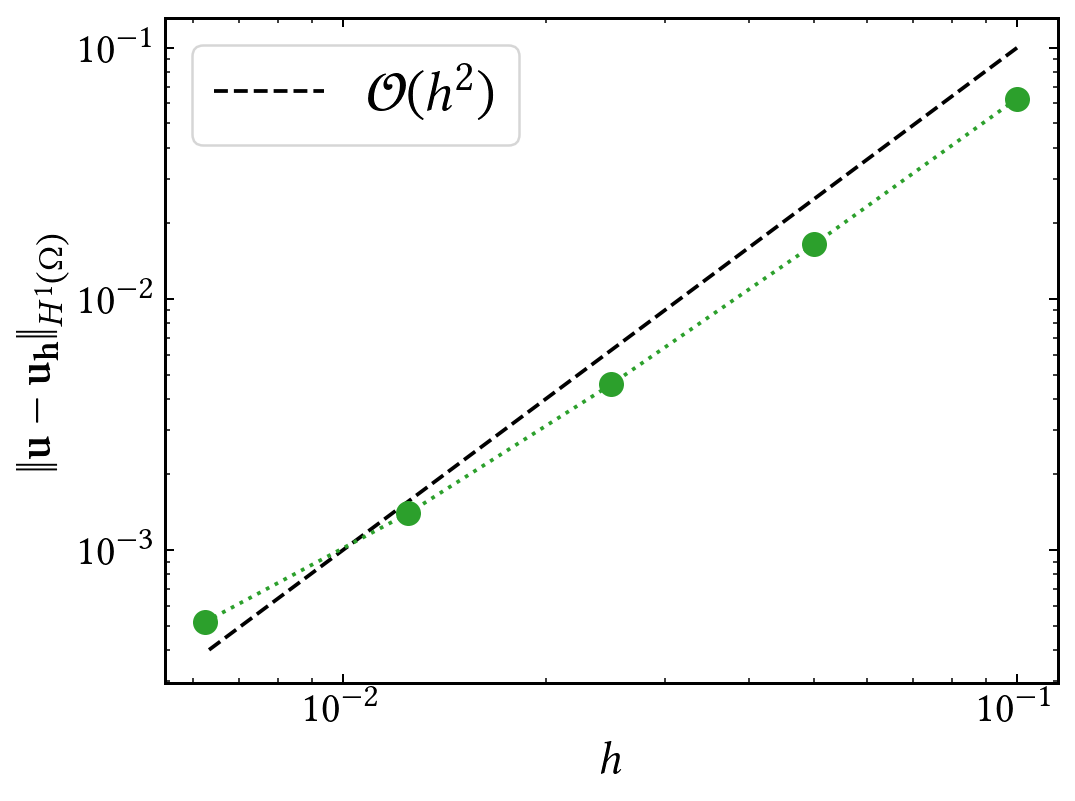

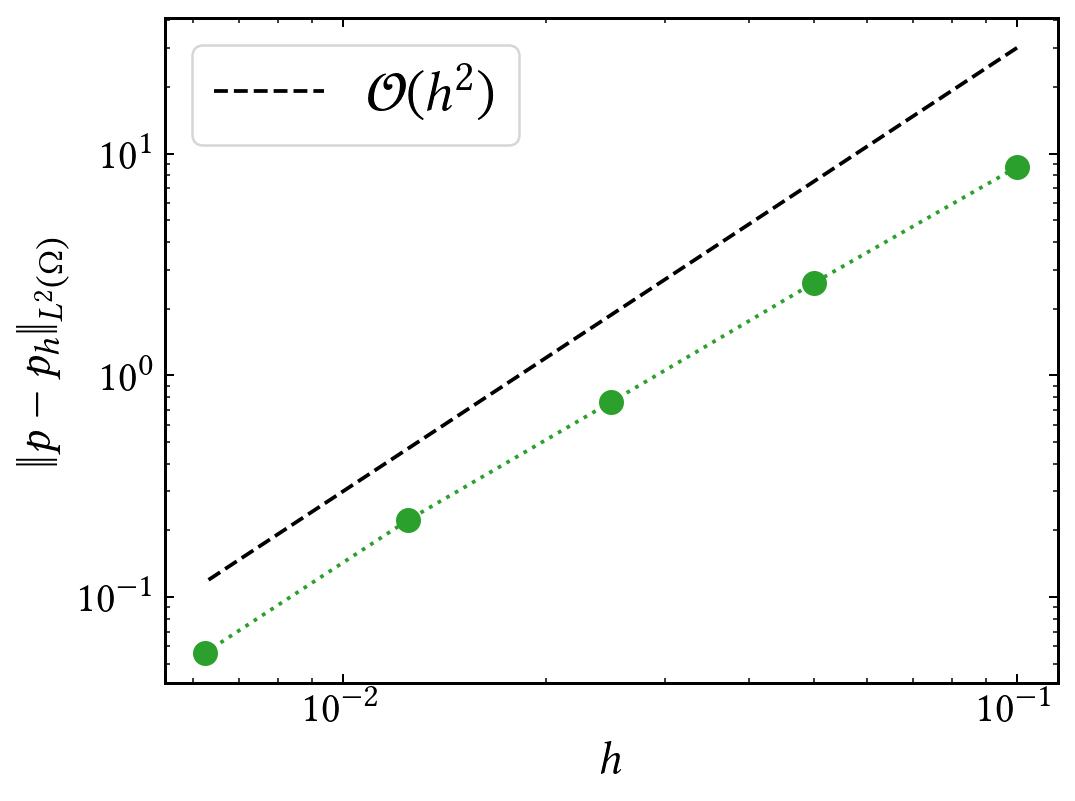

In [13]:
# Scott-Vogelius (Clough-Tocher refinement) (boundary_penalty = 100, tau_u = 1, tau_p = 1, patch macro stabilization) using hreg
L2_err_u_sv = [3.112732985986843, 1.602841791764422, 0.8031629062672114, 0.4038416176536286, 0.2015977464188546]
L2_err_p_sv = [69.29455263528078, 44.35019803006272, 30.59468430333384, 20.96239065332463, 14.77591596804482]
H1_err_u_sv = [18.71397144351319, 9.675716252555656, 4.904419760923775, 2.483803698455378, 1.253480610182857]
pwise_div_sv = [6.570282096163282e-10, 3.697436801175513e-10, 1.412847514328797e-09, 2.238949470267926e-09, 1.30961921029904e-08]

# Scott-Vogelius (boundary_penalty = 4000, tau_u = 1, tau_p = 1, patch macro stabilization) using hreg
L2_err_u_sv = [0.08836627857309076, 0.04446079894447599, 0.0222475271202901, 0.01112856046204407, 0.005564326240794838]
L2_err_p_sv = [8.567636443928961, 2.85077477710623, 1.143241998429748, 0.6253989116961072, 0.4135829617202995]
H1_err_u_sv = [0.6332302243251519, 0.2932190177953929, 0.1394980525706341, 0.06915882979189271, 0.0342673443406149]
pwise_div_sv = [2.88793433611545e-10, 1.169795371680493e-10, 1.154549345017131e-09, 1.226909296381251e-09, 1.944251593055668e-09]


# Scott-Vogelius symmetric Nitsche (boundary_penalty = 4000, tau_u = 1, tau_p = 1, patch macro stabilization) using hreg
L2_err_u_sv = [0.08884054042383659, 0.04468518689746496, 0.02236703701343748, 0.01118639005557769, 0.005594143016919934]
L2_err_p_sv = [8.466345829483766, 3.017389713777683, 1.198912629475741, 0.6460388567124132, 0.4217280219367645]
H1_err_u_sv = [0.6338549591191095, 0.2938059515917057, 0.1401134615799834, 0.06945188696659192, 0.03441608186217349]
pwise_div_sv = [3.665483472303777e-10, 2.797137937937677e-10, 2.178182856305e-09, 1.124754345216417e-09, 5.849565942739332e-09]

# Scott-Vogelius symmetric Nitsche (boundary_penalty = 4e5, tau_u = 1, tau_p = 1, patch macro stabilization)
L2_err_u_sv = [0.002029794819347847, 0.0004848938513957129, 0.0002263000766179555, 0.0001118422515301552, 5.581144138213036e-05]
L2_err_p_sv = [8.695592005805166, 2.617522303224839, 0.7594707825133437, 0.2230872223868502, 0.05628140976377725]
H1_err_u_sv = [0.06274645678741707, 0.01648172121011119, 0.004568352297924186, 0.00140111083348725, 0.0005182879539580367]
pwise_div_sv = [3.168365569905518e-11, 2.159003045787422e-10, 1.057413046012812e-09, 4.08395861573041e-09, 9.7329624360043e-09]


# Taylor-Hood (Clough-Tocher refinement)
# error_u_th = 
# error_p_th = 
# H1_err_u_th =
# err_div_th = 


h = [0.1, 0.05, 0.025, 0.0125, 0.00625]  

N_ct = [600, 2400, 9600, 38400, 153600]


plt.loglog(h, 1e1*np.power(h, 2), label=r"$\mathcal{O}(h^2)$", linestyle="--", color="black")  
plt.loglog(h, H1_err_u_sv, linestyle=":",  marker='o', markersize=9, color="C2") 
plt.xlabel(r"$h$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=17)
plt.ylabel(r"$\|\mathbf{u}-\mathbf{u_h}\|_{H^1(\Omega)}$", fontsize=18)
plt.legend(fontsize=22)
#plt.savefig("velocity_error_lambda5e4.pdf")
plt.show()

plt.loglog(h, 3.e3*np.power(h, 2), label=r"$\mathcal{O}(h^2)$", linestyle="--", color="black")  
plt.loglog(h, L2_err_p_sv, linestyle=":",  marker='o', markersize=9, color="C2") 
plt.xlabel(r"$h$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=17)
plt.ylabel(r"$\|p-p_h\|_{L^2(\Omega)}$", fontsize=18)
plt.legend(fontsize=22)
#plt.savefig("pressure_error_lambda5e4.pdf")
plt.show()


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
# #ax1.loglog(h, 7.e-2*np.power(h, 2), linestyle="--", color="black")  
# #ax1.loglog(h, 2e1*np.power(h, 3), label=r"$\mathcal{O}(h^{3})$", linestyle="-", color="black")  
# ax1.loglog(h, 1e1*np.power(h, 2), linestyle="--", color="black")  
# ax2.loglog(h, 7.e1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="--", color="black")  

# ax1.loglog(h, H1_err_u_sv, linestyle=":",  marker='o', markersize=9, color="C2") 
# ax1.set_xlabel(r"$h$", fontsize=18)
# ax1.tick_params(axis='both', which='major', labelsize=17)
# ax1.set_ylabel(r"$\|\mathbf{u}-\mathbf{u_h}\|_{H^1(\Omega)}$", fontsize=18)
# ax1.set_title(r"Velocity")

# ax2.loglog(h, L2_err_p_sv, linestyle="-.",  marker='o', markersize=9, color="C2") 
# #ax2.loglog([],[], linestyle="None", label=" ")
# ax2.loglog([],[], linestyle="None",  marker='o', markersize=9, color="C2", label=r"Scott-Vogelius")
# #ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, color="C0", label=r"Taylor-Hood")
# ax2.set_title(r"Pressure")
# ax2.set_xlabel(r"$h$", fontsize=18)
# ax2.tick_params(axis='both', which='major', labelsize=17)
# ax2.set_ylabel(r"$\|p-p_h\|_{L^2(\Omega)}$", fontsize=18)


# handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
# fig.legend(handles, labels, loc='lower center', ncols=2, bbox_to_anchor=(0.5, -0.125), fontsize=18, frameon=False)
# fig.tight_layout()
# #plt.savefig("scott_vogelius_lambda4e3.pdf")
# plt.tight_layout()
# plt.show()
